In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from collections import Counter

In [2]:
#reading the data

dataset = pd.read_csv("adult.csv",names = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income'], skipinitialspace = True)
dataset.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
#data preprocessing

cols = list(dataset)
for i in cols:
    dataset = dataset[dataset[i]!='?']
dataset.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


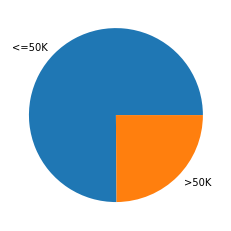

In [5]:
#data visualization for summary
label_column = dataset.iloc[:,-1].values
count = np.unique(label_column, return_counts = True)
labels = np.unique(label_column)
plt.pie(count[1], labels = labels)
plt.show()

In [6]:
#finding correlation among features

wc = dataset['workclass'].values.reshape(-1,1)
ed = dataset['education'].values.reshape(-1,1)
ms = dataset['marital_status'].values.reshape(-1,1)
oc = dataset['occupation'].values.reshape(-1,1)
rs = dataset['relationship'].values.reshape(-1,1)
rc = dataset['race'].values.reshape(-1,1)
sx = dataset['sex'].values.reshape(-1,1)
nc = dataset['native_country'].values.reshape(-1,1)

oe = OrdinalEncoder()

wc_ = oe.fit_transform(wc)
ed_ = oe.fit_transform(ed)
ms_ = oe.fit_transform(ms)
oc_ = oe.fit_transform(oc)
rs_ = oe.fit_transform(rs)
rc_ = oe.fit_transform(rc)
sx_ = oe.fit_transform(sx)
nc_ = oe.fit_transform(nc)

x = np.column_stack((dataset['age'], wc_, dataset['fnlwgt'], ed_, dataset['education_num'], ms_, oc_, rs_, rc_, sx_, dataset['capital_gain'], dataset['capital_loss'], dataset['hours_per_week'], nc_))


le = LabelEncoder()
label = le.fit_transform(dataset['income'])
dataset['income'] = label

y = dataset.iloc[:, -1].values

df = pd.DataFrame(np.hstack((x, y.reshape(-1,1))), columns = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income'])
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39.0,5.0,77516.0,9.0,13.0,4.0,0.0,1.0,4.0,1.0,2174.0,0.0,40.0,38.0,0.0
1,50.0,4.0,83311.0,9.0,13.0,2.0,3.0,0.0,4.0,1.0,0.0,0.0,13.0,38.0,0.0
2,38.0,2.0,215646.0,11.0,9.0,0.0,5.0,1.0,4.0,1.0,0.0,0.0,40.0,38.0,0.0
3,53.0,2.0,234721.0,1.0,7.0,2.0,5.0,0.0,2.0,1.0,0.0,0.0,40.0,38.0,0.0
4,28.0,2.0,338409.0,9.0,13.0,2.0,9.0,5.0,2.0,0.0,0.0,0.0,40.0,4.0,0.0


In [7]:
correlation = df.corr(method = 'pearson')
correlation

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
age,1.000000,0.080540,-0.076511,-0.001111,0.043526,-0.276373,-0.005682,-0.246456,0.023374,0.081993,0.080154,0.060165,0.101599,-0.001905,0.241998
workclass,0.080540,1.000000,-0.032493,0.017855,0.037833,-0.034241,0.015572,-0.067417,0.044731,0.074973,0.035350,0.007204,0.050724,0.007668,0.018044
fnlwgt,-0.076511,-0.032493,1.000000,-0.027102,-0.044992,0.032163,0.000204,0.009298,-0.023895,0.025362,0.000422,-0.009750,-0.022886,-0.066717,-0.008957
education,-0.001111,0.017855,-0.027102,1.000000,0.345410,-0.040664,-0.038212,-0.012717,0.011154,-0.027888,0.030575,0.015028,0.059887,0.078790,0.078987
education_num,0.043526,0.037833,-0.044992,0.345410,1.000000,-0.063419,0.087717,-0.091935,0.032805,0.006157,0.124416,0.079646,0.152522,0.091555,0.335286
marital_status,-0.276373,-0.034241,0.032163,-0.040664,-0.063419,1.000000,0.022655,0.177964,-0.068627,-0.119813,-0.042418,-0.035203,-0.189003,-0.025902,-0.193518
occupation,-0.005682,0.015572,0.000204,-0.038212,0.087717,0.022655,1.000000,-0.053727,0.000717,0.062313,0.022162,0.014607,0.018365,-0.003483,0.051577
relationship,-0.246456,-0.067417,0.009298,-0.012717,-0.091935,0.177964,-0.053727,1.000000,-0.117143,-0.584876,-0.058259,-0.063567,-0.257850,-0.010809,-0.251003
race,0.023374,0.044731,-0.023895,0.011154,0.032805,-0.068627,0.000717,-0.117143,1.000000,0.089186,0.014353,0.023517,0.048532,0.124514,0.071658
sex,0.081993,0.074973,0.025362,-0.027888,0.006157,-0.119813,0.062313,-0.584876,0.089186,1.000000,0.048814,0.047011,0.231268,0.000618,0.216699


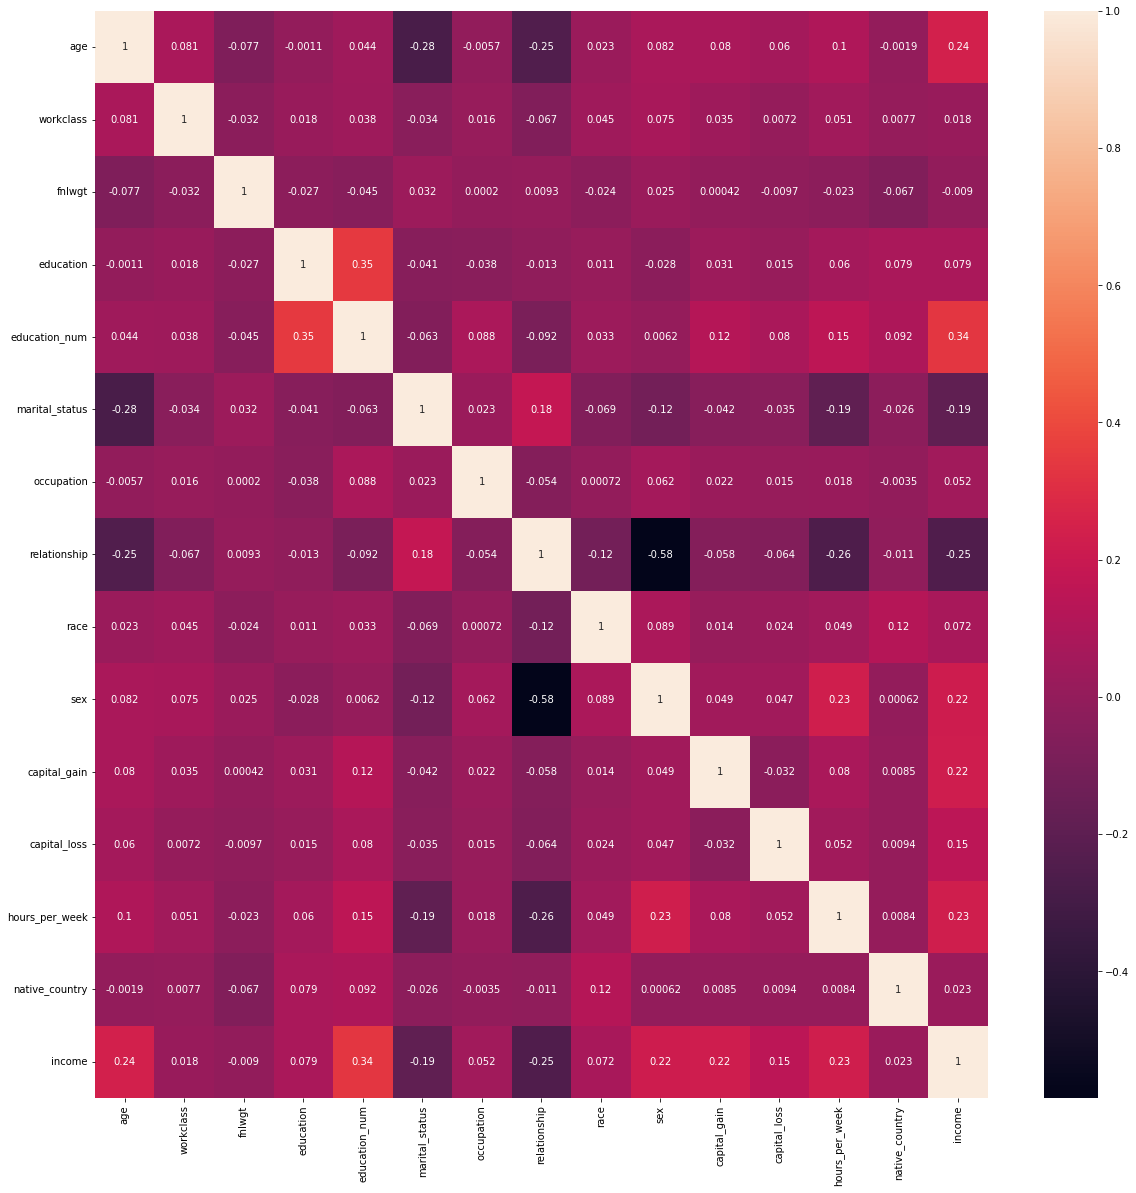

In [8]:
plt.figure(figsize = (20,20))
sns.heatmap(correlation, annot = True)
plt.show()

In [9]:
#feature selection

req_correlation = abs(correlation['income'])
correlation['income'] = req_correlation
req_features = req_correlation[req_correlation >= 0.1]
feature_names = [index for index, value in req_features.items()]
feature_names.remove('income')
feature_names

['age',
 'education_num',
 'marital_status',
 'relationship',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [10]:
x = dataset[feature_names].values
y = dataset.iloc[:, -1].values

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [12]:
class Node:
    def __init__(self, feature_name = None, feature_value = None, left = None, right = None, info_gain = None, classlabel = None):
        self.feature_name = feature_name
        self.feature_value = feature_value
        self.left = left
        self.right = right
        self.info_gain = info_gain
        self.classlabel = classlabel

In [13]:
#algorithm

class MyDecisionTreeClassifier:
    def __init__(self, no_of_minimum_samples = 2, maximum_depth = 5):
        self.no_of_minimum_samples = no_of_minimum_samples
        self.maximum_depth = maximum_depth
        self.root = None
    
    @staticmethod
    def calculate_entropy(label_column):
        strengths = np.bincount(np.array(label_column, dtype = np.int64))
        probabilities = strengths / len(label_column)
        entropy_value = 0
        for probability in probabilities:
            if probability > 0:
                entropy_value += probability*(np.log2(probability))
        return (-1*entropy_value)
    
    def calculate_information_gain(self, parent_data, left_data, right_data):
        prob_left = len(left_data) / len(parent_data)
        prob_right = len(right_data) / len(parent_data)
        return self.calculate_entropy(parent_data) - (prob_left*self.calculate_entropy(left_data) + prob_right*self.calculate_entropy(right_data))
    
    def find_best_split(self, x, y):
        best_split_criteria = {}
        best_info_gain = -1
        r, c = x.shape
        
        for i in range(c):
            xi = x[:,i]
            for val in np.unique(xi):
                df = np.concatenate((x, y.reshape(1, -1).T), axis=1)
                if xi.dtype.name != 'category':
                    left_df = np.array([sample for sample in df if sample[i] <= val])
                    right_df = np.array([sample for sample in df if sample[i] > val])
                else:
                    left_df = np.array([sample for sample in df if sample[i] == val])
                    right_df = np.array([sample for sample in df if sample[i] != val])
                if len(left_df) > 0 and len(right_df) > 0:
                    y = df[:,-1]
                    left_y = left_df[:,-1]
                    right_y = right_df[:,-1]
                    
                    info_gain = self.calculate_information_gain(y, left_y, right_y)
                    if info_gain > best_info_gain:
                        best_split_criteria = {"feature_index" : i, "threshold" : val, "left_data" : left_df, "right_data" : right_df, "information_gain" : info_gain}
                        best_info_gain = info_gain
        return best_split_criteria
    
    def build(self,x,y,curr_depth = 0):
        r,c = x.shape
        if r > self.no_of_minimum_samples and curr_depth <= self.maximum_depth:
            best_criteria = self.find_best_split(x,y)
            if best_criteria['information_gain'] > 0:
                left_part = self.build(x = best_criteria['left_data'][:,:-1], y = best_criteria['left_data'][:,-1], curr_depth = curr_depth + 1)
                right_part = self.build(x = best_criteria['right_data'][:,:-1], y = best_criteria['right_data'][:,-1], curr_depth = curr_depth + 1)
                return Node(feature_name = best_criteria['feature_index'], feature_value = best_criteria['threshold'], left = left_part, right = right_part, info_gain = best_criteria['information_gain'])
        return Node(classlabel=Counter(y).most_common(1)[0][0])
    
    def fit(self, x, y):
        self.root = self.build(x, y)
        
    def make_prediction(self, x, dtree):
        if dtree.classlabel != None:
            return dtree.classlabel
        fval = x[dtree.feature_name]
        if (isinstance(x[dtree.feature_name],str) == False):
            if fval <= dtree.feature_value:
                return self.make_prediction(x = x, dtree = dtree.left)
            if fval > dtree.feature_value:
                return self.make_prediction(x = x, dtree = dtree.right)
        if isinstance(x[dtree.feature_name],str):
            if fval == dtree.feature_value:
                return self.make_prediction(x = x, dtree = dtree.left)
            if fval != dtree.feature_value:
                return self.make_prediction(x = x, dtree = dtree.right)
    
    def predict(self, X):
        return [self.make_prediction(x, self.root) for x in X]
    
    def printDTree(self, dtree, feature_names, spacing = ""):
        if dtree.classlabel != None:
            print(spacing+"Prediction:"+str(dtree.classlabel))
            return
        print(spacing+str(feature_names[dtree.feature_name])+" =/ <= "+str(dtree.feature_value)+"?")
        print(spacing+'--> True:')
        self.printDTree(dtree.left, feature_names, spacing+" ")
        print(spacing+'--> False:')
        self.printDTree(dtree.right, feature_names, spacing+" ")
    
    def printTree(self,feature_names):
        return self.printDTree(self.root,feature_names,"")

In [14]:
#model creation
model = MyDecisionTreeClassifier()

In [15]:
#model fitting
model.fit(x_train, y_train)

In [16]:
#print Decision Tree
model.printTree(feature_names)

relationship =/ <= Husband?
--> True:
 education_num =/ <= 12?
 --> True:
  capital_gain =/ <= 5013?
  --> True:
   education_num =/ <= 7?
   --> True:
    age =/ <= 36?
    --> True:
     capital_loss =/ <= 1573?
     --> True:
      Prediction:0
     --> False:
      Prediction:0
    --> False:
     age =/ <= 66?
     --> True:
      Prediction:0
     --> False:
      Prediction:0
   --> False:
    age =/ <= 35?
    --> True:
     capital_loss =/ <= 1740?
     --> True:
      Prediction:0
     --> False:
      Prediction:1
    --> False:
     capital_loss =/ <= 1844?
     --> True:
      Prediction:0
     --> False:
      Prediction:1
  --> False:
   age =/ <= 61?
   --> True:
    Prediction:1
   --> False:
    capital_gain =/ <= 9386?
    --> True:
     age =/ <= 73?
     --> True:
      Prediction:1
     --> False:
      Prediction:0
    --> False:
     capital_gain =/ <= 10566?
     --> True:
      Prediction:0
     --> False:
      Prediction:1
 --> False:
  capital_gain =/ <= 50

In [17]:
#model evaluation
y_pred = model.predict(x_test)

In [18]:
#test accuarcy of our model
accuracy_score(y_test, y_pred)

0.7895504574990054

In [19]:
cm = confusion_matrix(y_test, y_pred)

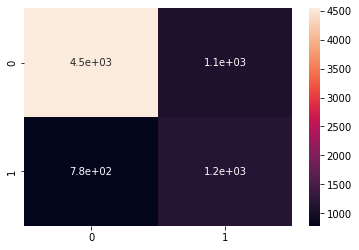

In [20]:
sns.heatmap(cm, annot = True)
plt.show()

In [21]:
#data preparation for using sklearn's Decision Tree Classifier
x = df[feature_names].values
y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [22]:
#model creation, fitting, evaluation, and test accuracy

sk_model = DecisionTreeClassifier(max_depth = 5, criterion = 'entropy')
sk_model.fit(x_train, y_train)
sk_preds = sk_model.predict(x_test)

accuracy_score(y_test, sk_preds)

0.8471025062988994

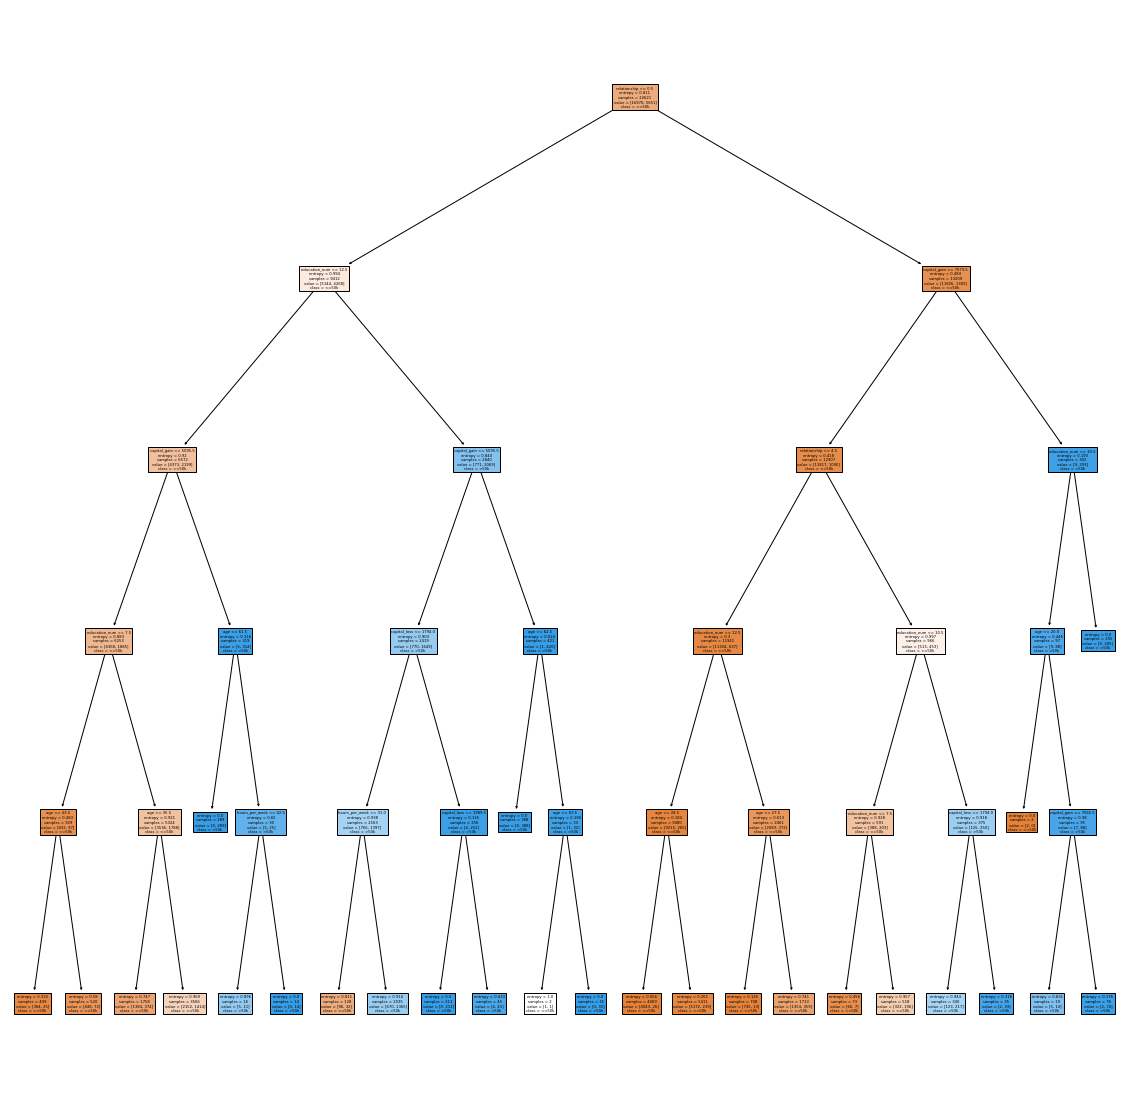

In [23]:
#plot the Decision Tree

from sklearn import tree
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(sk_model, feature_names=feature_names, class_names= ['<=50k','>50k'], filled=True)

In [24]:
cm = confusion_matrix(y_test, sk_preds)

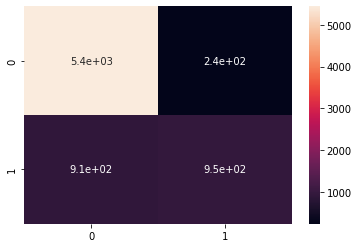

In [25]:
sns.heatmap(cm, annot = True)
plt.show()

In [26]:
#save plot
fig.savefig("decistion_tree.png")